# **Problem Statement**

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.



Grading:  80% if meet the above requirements

Up to 20% for presentation and explanation.



Reference Notebook

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynbLinks to an external site.

# **ABSTRACT**

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.
By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.


# **About the Dataset**

This dataset has 29 features and 2240 records.
Details of Features are as below:

Id: Unique identifier for each individual in the dataset.
Year_Birth: The birth year of the individual.
Education: The highest level of education attained by the individual.
Marital_Status: The marital status of the individual.
Income: The annual income of the individual.
Kidhome: The number of young children in the household.
Teenhome: The number of teenagers in the household.
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
Recency: The number of days since the last purchase or interaction.
MntWines: The amount spent on wines.
MntFruits: The amount spent on fruits.
MntMeatProducts: The amount spent on meat products.
MntFishProducts: The amount spent on fish products.
MntSweetProducts: The amount spent on sweet products.
MntGoldProds: The amount spent on gold products.
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
NumWebPurchases: The number of purchases made through the company's website.
NumCatalogPurchases: The number of purchases made through catalogs.
NumStorePurchases: The number of purchases made in physical stores.
NumWebVisitsMonth: The number of visits to the company's website in a month.
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
Z_CostContact: A constant cost associated with contacting a customer.
Z_Revenue: A constant revenue associated with a successful campaign response.
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [120]:
!pip install shap

In [121]:
pip install opendatasets


# **Loading Libraries**

In [122]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import shap  # Importing SHAP library for SHAP (SHapley Additive exPlanations) values computation
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn for splitting data into training and testing sets
from sklearn.pipeline import Pipeline  # Importing Pipeline class from scikit-learn for constructing pipelines
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder  # Importing preprocessing functions/classes from scikit-learn for data preprocessing
from sklearn_pandas import DataFrameMapper  # Importing DataFrameMapper from sklearn_pandas for mapping DataFrame columns to different transformations
from sklearn.impute import SimpleImputer  # Importing SimpleImputer from scikit-learn for handling missing values
from sklearn.linear_model import LinearRegression  # Importing LinearRegression class from scikit-learn for linear regression modeling
from sklearn.metrics import mean_absolute_error  # Importing mean_absolute_error function from scikit-learn for evaluating model performance
import statsmodels.api as sm  # Importing statsmodels library for statistical modeling and analysis
import numpy as np  # Importing numpy library for numerical computing
import matplotlib.pyplot as plt  # Importing matplotlib library for creating visualizations


In [123]:
# Importing pandas library for data manipulation and analysis
import pandas as pd

# Importing numpy library for numerical computing
import numpy as np

# Importing matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Importing seaborn library for statistical data visualization
import seaborn as sns

# Importing plotly.express for interactive plotting
import plotly.express as px

# Importing graphviz for visualizing decision trees
import graphviz

# Importing make_subplots from plotly.subplots for creating subplots
from plotly.subplots import make_subplots

# Importing datetime module for manipulating dates and times
from datetime import datetime

# Importing train_test_split function from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LogisticRegression class from scikit-learn for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Importing plot_tree function from scikit-learn for plotting decision trees
from sklearn.tree import plot_tree

# Importing pydotplus for generating Graphviz DOT files for decision tree visualization
import pydotplus  # Make sure to install it using "pip install pydotplus"

# Importing export_graphviz from scikit-learn for exporting decision tree models to Graphviz DOT format
from sklearn.tree import export_graphviz

# Importing accuracy_score function from scikit-learn for evaluating classification accuracy
from sklearn.metrics import accuracy_score

# Importing f1_score and confusion_matrix functions from scikit-learn for evaluating classification performance
from sklearn.metrics import f1_score, confusion_matrix

# Importing metrics from scikit-learn for calculating various evaluation metrics
from sklearn import metrics

# Importing variance_inflation_factor from statsmodels for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing xgboost library for gradient boosting
import xgboost as xgb

# Importing plot_importance from xgboost for plotting feature importance
from xgboost import plot_importance


Loading the data set from Kaggle

In [124]:
import opendatasets as od  # Importing the opendatasets library for accessing and downloading datasets from online repositories




In [125]:
data = "https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering"

In [126]:
od.download(data)

Skipping, found downloaded files in "./customer-segmentation-clustering" (use force=True to force download)


In [127]:
import os  # Importing os module for interacting with the operating system

# Defining the directory where the dataset is located
data_dir = '.\customer-segmentation-clustering'

In [128]:
url = "https://raw.githubusercontent.com/solankiram2023/Data-Science-Engineering-Methods/main/customer_segmentation-2.csv"

In [129]:
#Read the dataset csv into data variable
data = pd.read_csv('https://raw.githubusercontent.com/solankiram2023/Data-Science-Engineering-Methods/main/customer_segmentation-2.csv')

In [130]:
dff = pd.read_csv(url)

In [131]:
dff.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [132]:
dff.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Data Cleaning

In [133]:
dff.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [134]:
mean = dff["Income"].mean()
dff["Income"].fillna(mean, inplace=True)
dff.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [135]:
x = dff.drop('Response', axis=1)  # Assuming you want to drop the 'Response' column from the DataFrame `dff`


In [136]:
y=dff.Response

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'Income' as the target variable. Ensure it is numeric and handle missing values
data['Income'] = pd.to_numeric(data['Income'], errors='coerce').fillna(data['Income'].median())

# Prepare the dataset
X = data.drop(['Education', 'Marital_Status', 'Dt_Customer'], axis=1)  # Dropping non-numeric and unnecessary columns
y = data['Response']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
print(pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient']))


MSE: 1.231255269527604e-29
                      Coefficient
ID                  -2.529318e-19
Year_Birth          -4.864680e-17
Income              -9.320192e-22
Kidhome             -7.028246e-15
Teenhome            -3.131251e-15
Recency             -1.127372e-18
MntWines            -1.940265e-18
MntFruits           -2.929368e-17
MntMeatProducts     -7.095620e-18
MntFishProducts     -1.014484e-18
MntSweetProducts     2.648044e-17
MntGoldProds        -1.493591e-17
NumDealsPurchases    3.662985e-16
NumWebPurchases     -6.473191e-17
NumCatalogPurchases  2.039766e-16
NumStorePurchases   -6.783892e-17
NumWebVisitsMonth    2.621924e-16
AcceptedCmp3        -8.706361e-16
AcceptedCmp4         3.259366e-16
AcceptedCmp5        -5.400977e-16
AcceptedCmp1        -6.854779e-16
AcceptedCmp2         1.717926e-16
Complain            -1.599005e-16
Z_CostContact        0.000000e+00
Z_Revenue            0.000000e+00
Response             1.000000e+00


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [139]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical features in x_train
x_train_encoded = encoder.fit_transform(x_train)

# Transform the categorical features in x_test
x_test_encoded = encoder.transform(x_test)

# Now, you can fit the logistic regression model to the encoded training data
logreg.fit(x_train_encoded, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LogisticRegression()

Label encoding to remove categorical data

In [140]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the NBA players data

# Define categorical columns
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']

# Create a copy of the DataFrame to avoid modifying the original data
data_encoded = dff.copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data[col])

# Now df_encoded contains the label encoded categorical variables
print(data_encoded.head())


     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0           80       58       635  ...                  7             0   
1          157       38        11  ...                  5             0   
2          444       26       426  ...                  4             0   
3          199       26        11  ...                  6             0   
4          390       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        

In [141]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Response'], dff[['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.35e-139
Time:                        00:57:32   Log-Likelihood:                -502.80
No. Observations:                2240   AIC:                             1050.
Df Residuals:                    2218   BIC:                             1175.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -1.625e-06   1.99e-06     -0.816      0.415   -5.53e-06    2.28e-06
Year_Birth           1.949e-05      0.001      0.035      0.972      -0.001       0.001
Income              -3.385e-07   3.76e-07     -0.901      0.368   -1.07e-06    3.98e-07
Recency                -0.0024      0.000    -10.731      0.000      -0.003      -0.002
MntWines               2.6e-05   3.49e-05      0.746      0.456   -4.23e-05    9.43e-05
MntFruits               0.0004      0.000      1.553      0.121    -9.2e-05       0.001
MntMeatProducts         0.0003   4.76e-05      6.038      0.000       0.000       0.000
MntFishProducts     -9.238e-05      0.000     -0.541      0.589      -0.000       0.000
MntSweetProducts     -1.91e-05      0.000     -0.089      0.929      -0.000       0.000
MntGoldProds            0.0002      0.000      1.054      0.292      -0.000       0.000
NumDealsPurchases       0.0061      0.004      1.566      0.118      -0.002       0.014
NumWebPurchases         0.0072      0.003      2.263      0.024       0.001       0.013
NumCatalogPurchases     0.0067      0.004      1.764      0.078      -0.001       0.014
NumStorePurchases      -0.0160      0.003     -5.296      0.000      -0.022      -0.010
NumWebVisitsMonth       0.0184      0.004      4.609      0.000       0.011       0.026
AcceptedCmp3            0.2572      0.026      9.869      0.000       0.206       0.308
AcceptedCmp4            0.1026      0.029      3.595      0.000       0.047       0.159
AcceptedCmp5            0.2573      0.031      8.232      0.000       0.196       0.319
AcceptedCmp1            0.1888      0.030      6.249      0.000       0.130       0.248
AcceptedCmp2            0.1999      0.060      3.329      0.001       0.082       0.318
Complain                0.0370      0.067      0.552      0.581      -0.094       0.168
Z_CostContact           0.0200      0.367      0.054      0.957      -0.701       0.741
==============================================================================
Omnibus:                      556.465   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.544
Skew:                           1.417   Prob(JB):                    2.73e-262
Kurtosis:                       5.207   Cond. No.                     3.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming you have already split your data into training and testing sets
# Assuming your training features are stored in a variable named x_train
# Replace 'x_train' with the actual variable name containing your training features
categorical_features = ['Education', 'Marital_Status', 'Dt_Customer']
numerical_features = [c for c in x_train.columns if c not in categorical_features]

# Creating transformers for numerical and categorical features
cat = [(c, [OrdinalEncoder()]) for c in categorical_features]
num = [(n, [SimpleImputer(), StandardScaler()]) for n in numerical_features]

# Create DataFrameMapper
mapper = DataFrameMapper(num + cat, df_out=True)




In [143]:
def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(x)
        X = sm.add_constant(X, has_constant='add')  # Fix: Use X instead of x
    else:
        X = x  # If no transformation is needed, use original x
    y_pred = reg.predict(X)  # Fix: Use X instead of x
    return mean_absolute_error(y, y_pred)


In [144]:
# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
x_train_encoded = preprocessor.fit_transform(x_train)

# Transform the testing data
x_test_encoded = preprocessor.transform(x_test)



# **2. Fit a tree-based model and interpret the nodes**

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_encoded.drop('Response', axis=1)
y = data_encoded['Response']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Making predictions

predictions = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
train_mse = mean_squared_error(y_train, train_predictions)

print(f"Mean Squared Error for test: {mse}")
print(f"Mean Squared Error for train: {train_mse}")

Mean Squared Error for test: 0.10631763392857144
Mean Squared Error for train: 0.012191462053571429


In [146]:
# Making predictions on the training data
train_predictions = rf_model.predict(X_train)

# Evaluating the model on the training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Mean Squared Error for Training Data: {train_mse}")

Mean Squared Error for Training Data: 0.012191462053571429


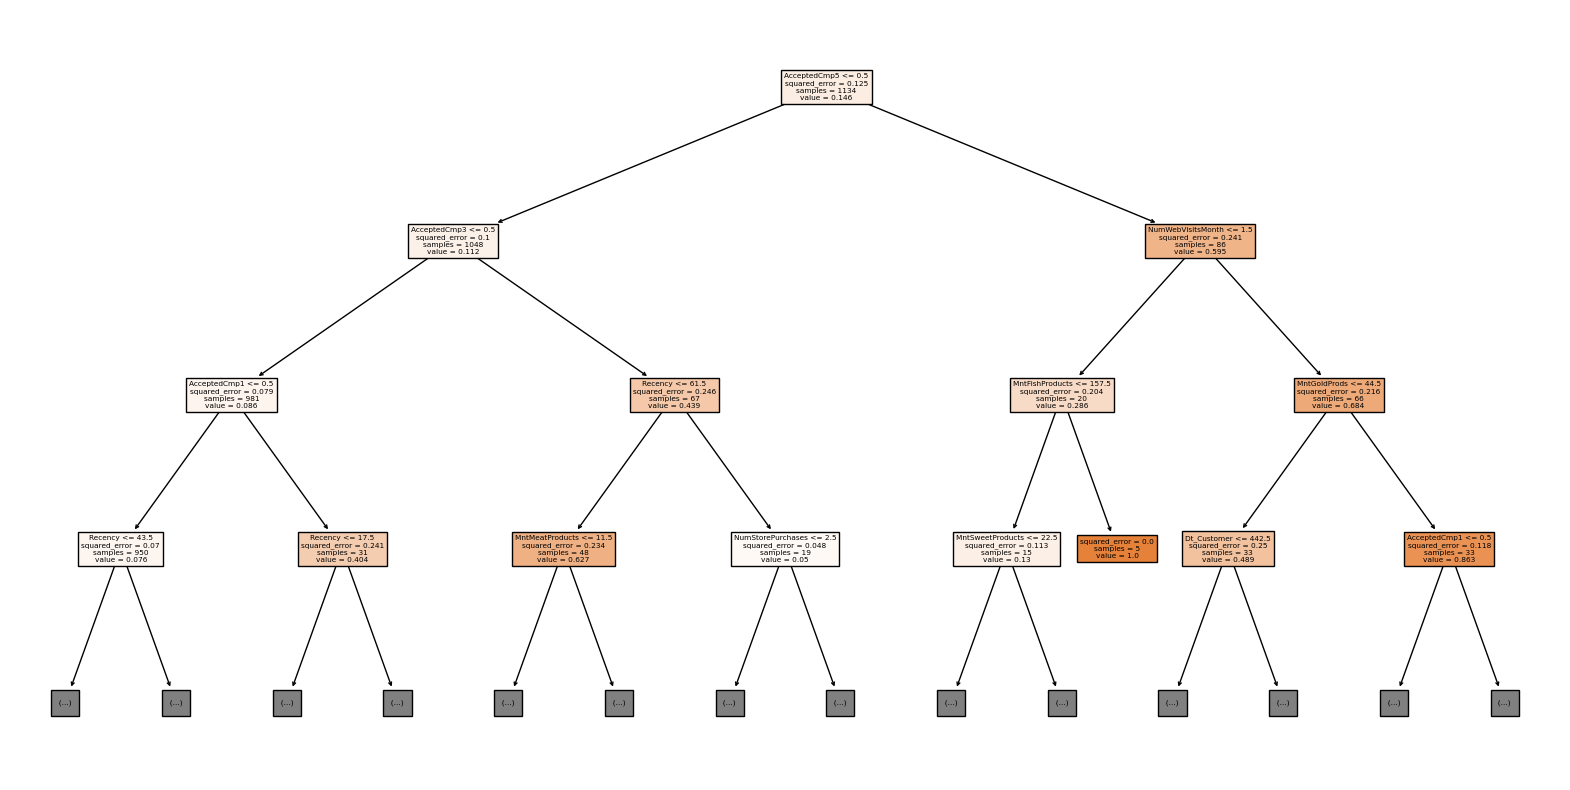

In [147]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming your RandomForestRegressor is named rf_model
# Extract one of the trees from the forest
tree = rf_model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()

In [180]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have trained a Random Forest model and stored it in the variable 'rf_model'
rf_model = RandomForestRegressor()

# Assuming you have trained the model on your data, and 'X_train' contains your features and 'y_train' contains your target variable

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a dictionary to store feature importances with feature names
feature_importance_dict = dict(zip(X_train.columns, importances))

# Sort the dictionary by feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Recency: 0.11416834236938253
AcceptedCmp5: 0.10952764400537211
ID: 0.06655290899054953
AcceptedCmp3: 0.061771930580595574
MntMeatProducts: 0.05624296663216206
Income: 0.05565155302297991
MntWines: 0.051143952291515304
Dt_Customer: 0.04552067686067569
Year_Birth: 0.0421075943119569
MntGoldProds: 0.04136845471572345
NumWebVisitsMonth: 0.03937042108511195
AcceptedCmp1: 0.039069170629269644
NumCatalogPurchases: 0.03653278532459299
MntSweetProducts: 0.03636769249418488
NumDealsPurchases: 0.03308338028583997
MntFishProducts: 0.031072253290119808
NumStorePurchases: 0.026162398438992908
Marital_Status: 0.024569220986583734
MntFruits: 0.024227822619036908
NumWebPurchases: 0.0232499353817152
Education: 0.015691113998827434
AcceptedCmp2: 0.009261291729576904
AcceptedCmp4: 0.005579962381165414
Teenhome: 0.004796966904692408
Kidhome: 0.004340982097115086
Complain: 0.002568578572261746
Z_CostContact: 0.0
Z_Revenue: 0.0


# **3.  Use auto ml to find the best model**

In [148]:
dff = h2o.H2OFrame(dff)
dff.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [149]:
import h2o


In [150]:
pip install h2o

In [151]:
import h2o

# Initialize the H2O cluster
h2o.init()

# Convert DataFrame to H2OFrame
df = h2o.H2OFrame(data_encoded)

# Display the first few rows of the H2OFrame
data_encoded.head()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,42 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_xxuog3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.164 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0


In [152]:
train, test = df.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [153]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [154]:
drift_data["is_train"].table()

is_train,Count
0,563
1,1677


In [155]:
x = list(set(train.col_names) - set(["Response"]))

In [156]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Response", training_frame=train)

AutoML progress: |
00:21:17.301: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:21:17.301: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
00:21:30.357: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:21:30.357: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
00:21:31.947: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:21:31.948: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical be

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20240318_02117


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 38                          68830                  16           20           18.2368       116           157           139.026

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.08915077549324342
RMSE: 0.29858127116958194
MAE: 0.1722798709549023
RMSLE: 0.21195149073755756
Mean Residual Deviance: 0.08915077549324342

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.08892430649126117
RMSE: 0.29820178820936194
MAE: 0.17935671850538393
RMSLE: 0.2106777027579879
Mean Residual Deviance: 0.08892430649126117

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     0.180648   0.00587163  0.177061      0.180896      0.185787      0.172786      0.186711
mean_residual_deviance  0.0893228  0.00575213  0.0851486     0.0986197     0.0863915     0.0852693     0.0911848
mse                     0.0893228  0.00575213  0.0851486     0.0986197     0.0863915     0.0852693     0.0911848
r2                      0.2956     0.0748285   0.338636      0.165384      0.319629      0.349732      0.30462
residual_deviance       0.0893228  0.00575213  0.0851486     0.0986197     0.0863915     0.0852693     0.0911848
rmse                    0.298748   0.00950095  0.291802      0.314038      0.293924      0.292009      0.301968
rmsle                   0.210898   0.00695733  0.206428      0.221879      0.208012      0.204717      0.213453

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-18 00:21:49  6.642 sec   0                  nan              nan             nan
    2024-03-18 00:21:49  6.838 sec   5                  0.370822         0.176192        0.137509
    2024-03-18 00:21:49  7.024 sec   10                 0.337236         0.17485         0.113728
    2024-03-18 00:21:50  7.197 sec   15                 0.319219         0.172785        0.101901
    2024-03-18 00:21:50  7.331 sec   20                 0.307609         0.171518        0.0946236
    2024-03-18 00:21:50  7.457 sec   25                 0.301977         0.169736        0.0911903
    2024-03-18 00:21:50  7.591 sec   30                 0.300625         0.171097        0.0903752
    2024-03-18 00:21:50  7.710 sec   35                 0.298647         0.172172        0.0891899
    2024-03-18 00:21:50  7.784 sec   38                 0.298581         0.17228         0.0891508

Variable Importances: 
variable           relative_importance    scaled_importance     percentage
-----------------  ---------------------  --------------------  --------------------
Recency            486.7491760253906      1.0                   0.09101477731219015
AcceptedCmp1       411.2162780761719      0.8448217240633219    0.07689126108412381
AcceptedCmp5       371.8098449707031      0.763863326912562     0.06952285059589554
AcceptedCmp3       365.49041748046875     0.7508804030546595    0.06834121267210742
MntWines           353.4802551269531      0.726206170523675     0.06609549

In [157]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20240318_02117,0.179357,0.298202,0.0889243,0.210678,0.0889243
DRF_2_AutoML_2_20240318_05759,0.179357,0.298202,0.0889243,0.210678,0.0889243
GBM_2_AutoML_1_20240318_02117,0.180068,0.297143,0.0882942,0.208476,0.0882942
GBM_6_AutoML_2_20240318_05759,0.180068,0.297143,0.0882942,0.208476,0.0882942
GBM_8_AutoML_2_20240318_05759,0.181103,0.297459,0.0884816,0.209483,0.0884816
GBM_4_AutoML_1_20240318_02117,0.181103,0.297459,0.0884816,0.209483,0.0884816
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_02117,0.18257,0.293216,0.0859758,0.206296,0.0859758
GBM_7_AutoML_2_20240318_05759,0.18276,0.298559,0.0891373,0.21019,0.0891373
GBM_3_AutoML_1_20240318_02117,0.18276,0.298559,0.0891373,0.21019,0.0891373
StackedEnsemble_AllModels_1_AutoML_1_20240318_02117,0.183182,0.293939,0.0864003,0.20676,0.0864003


In [158]:
print(aml.leaderboard)

model_id                                                     mae      rmse        mse     rmsle    mean_residual_deviance
DRF_1_AutoML_1_20240318_02117                           0.179357  0.298202  0.0889243  0.210678                 0.0889243
DRF_2_AutoML_2_20240318_05759                           0.179357  0.298202  0.0889243  0.210678                 0.0889243
GBM_2_AutoML_1_20240318_02117                           0.180068  0.297143  0.0882942  0.208476                 0.0882942
GBM_6_AutoML_2_20240318_05759                           0.180068  0.297143  0.0882942  0.208476                 0.0882942
GBM_8_AutoML_2_20240318_05759                           0.181103  0.297459  0.0884816  0.209483                 0.0884816
GBM_4_AutoML_1_20240318_02117                           0.181103  0.297459  0.0884816  0.209483                 0.0884816
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_02117  0.18257   0.293216  0.0859758  0.206296                 0.0859758
GBM_7_AutoML_2_20240318_

# **Shap Plots**

# **4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [159]:
pip install shap


In [160]:
import shap


In [161]:
shap.initjs()

In [162]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

# **Shap Plot for Tree based model**

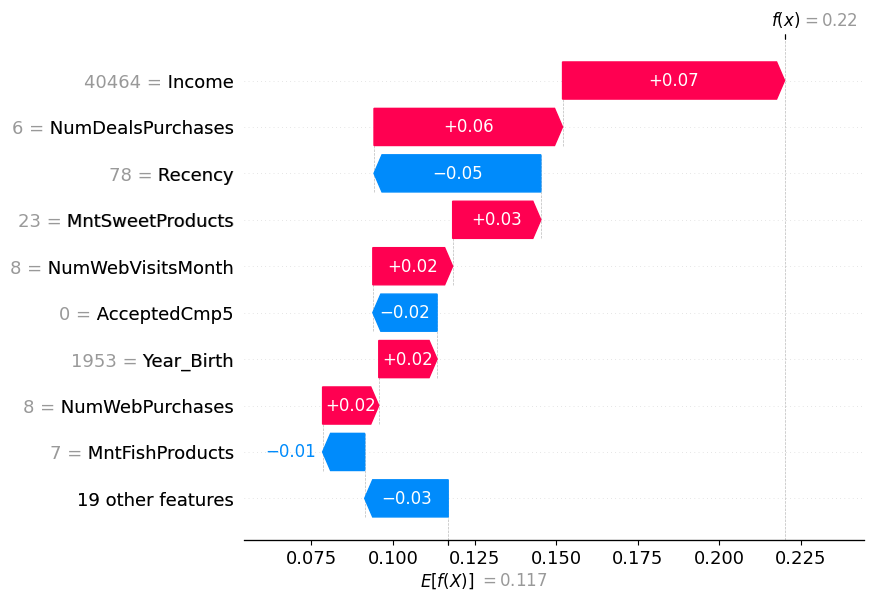

In [169]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Assuming 'X' are your features and 'y' is your target variable
# For demonstration, replace these with actual features and target from your dataset
X = data_encoded.drop(columns=['Response'])
y = data_encoded['Response']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Fitting a RandomForestRegressor (Replace with your actual model)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values
shap_values = explainer(X_test)

# Visualize the SHAP Values for the first prediction
shap.plots.waterfall(shap_values[0])


# **Shap Plot for Linear Regression model**

PermutationExplainer explainer: 449it [00:18, 10.13it/s]                         


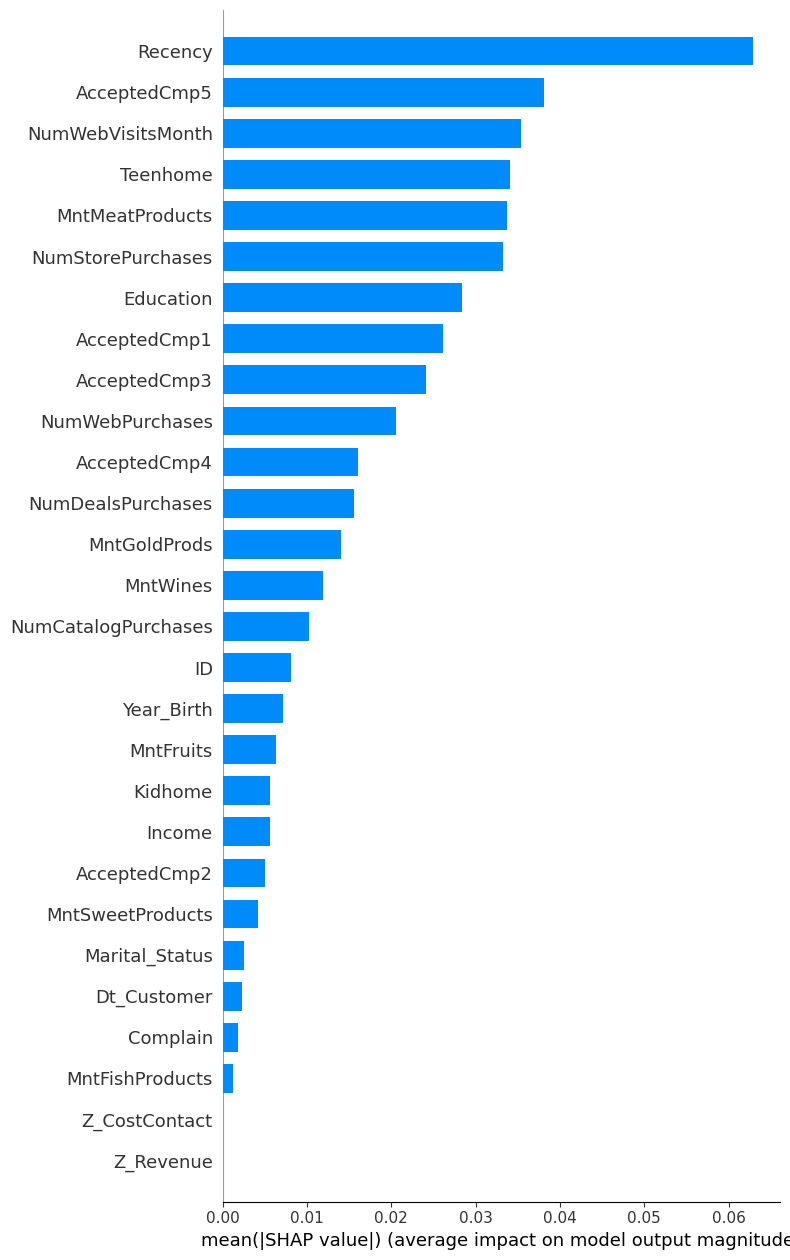

In [173]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming you have a DataFrame df with your data and target_column as your target variable
target_column = 'Response'  # Replace with your actual target column name
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Set the plot size to be larger
plt.figure(figsize=(16, 10))  # Adjust the size as needed to fit your number of features

# Plot SHAP values with feature names displayed
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns, max_display=X_test.shape[1])

# Show the plot
plt.show(shap_values)

In [176]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Assuming 'df' is your pandas DataFrame
# Convert your DataFrame to H2O Frame
hf = h2o.H2OFrame(data_encoded)

# Specify target and features
target = 'Response'
features = hf.columns
features.remove(target)

# Split the data (H2O Frame) into train and test sets
train, test = hf.split_frame(ratios=[.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML( max_runtime_secs=60, seed=1)
aml.train(x=features, y=target, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 17 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_xxuog3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.153 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
01:32:51.836: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact]
01:32:51.836: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████
01:32:57.729: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact]
01:32:57.729: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
01:32:58.398: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact]
01:32:58.398: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model ins

In [178]:
# Select the top model (or any model of interest from the leaderboard)
best_model = aml.leader

# For H2O models, we typically use H2O's native feature importance. However, to use SHAP,
# we need to convert test data to a pandas DataFrame and use H2O's predict function.

test_df = test.as_data_frame()  # Convert test H2OFrame to pandas DataFrame
features_df = test_df.drop(target, axis=1)
true_outcome = test_df[target]

# Predict using the selected model
predictions = best_model.predict(h2o.H2OFrame(features_df)).as_data_frame()

# SHAP analysis typically requires a more manual approach with H2O models since direct SHAP integration may be limited
# For detailed SHAP analysis with H2O models, it's often recommended to approximate or use model-agnostic methods
# or extract the underlying model parameters for tree-based models and use tree-specific SHAP explanations if applicable.

# Note: The above steps demonstrate the process of selecting a model and preparing for analysis.
# Direct SHAP analysis with H2O models may not be straightforward and could require model-specific handling.


Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


# **Shap Plot for AutoML based model**

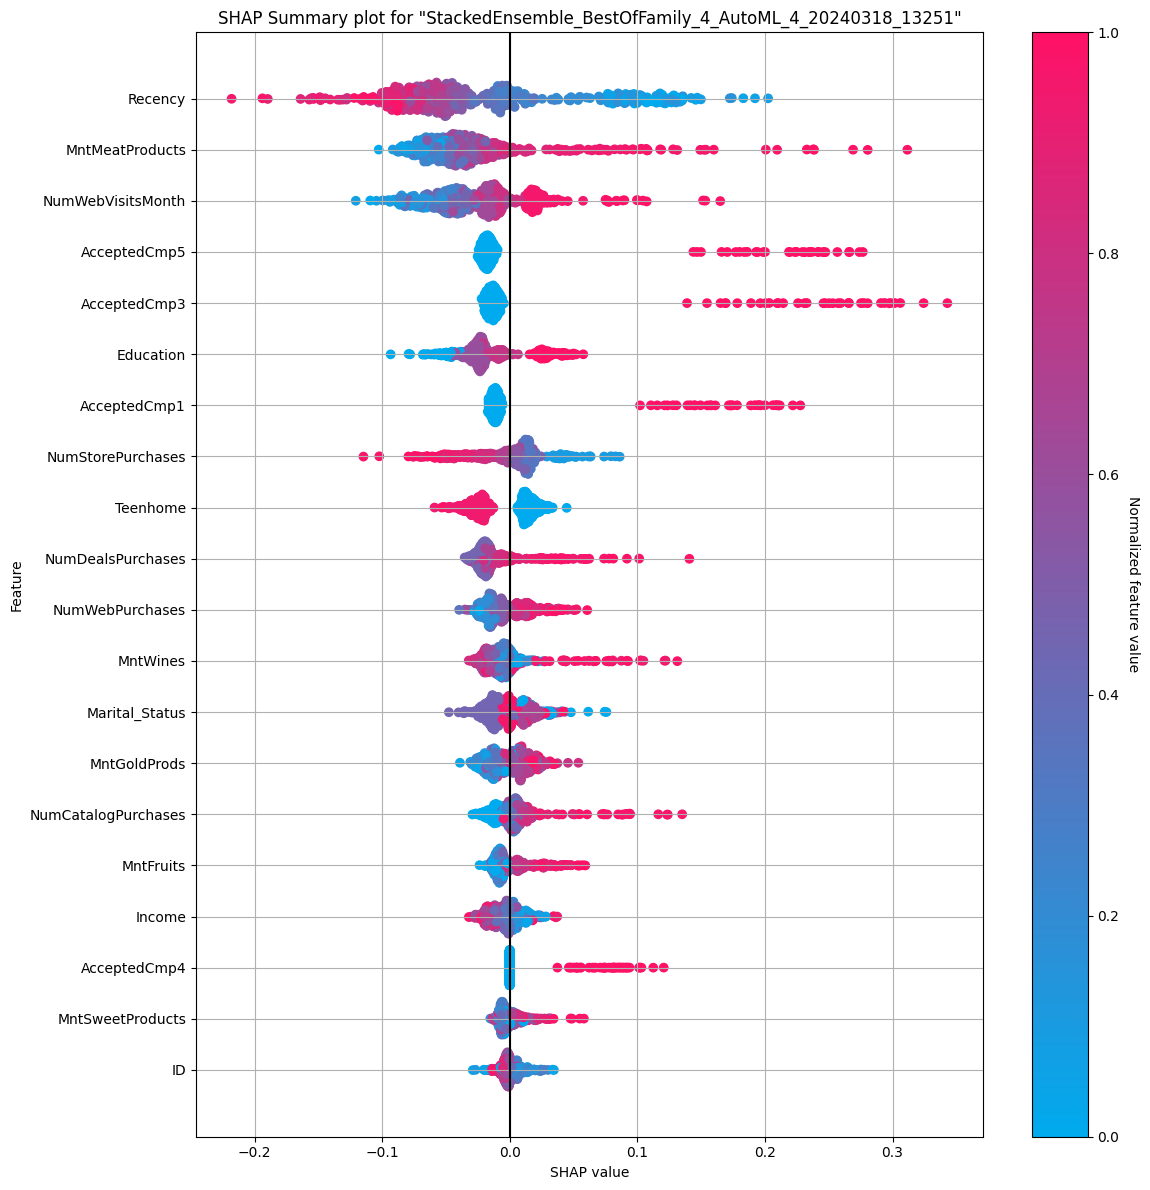

In [179]:
# Assuming 'train' is your H2OFrame containing the training data
# This will split your data into a 1% sample and the rest, you can adjust the ratios as needed
splits = train.split_frame(ratios=[0.01], seed=42)

# Use the smaller split as the background dataset for SHAP calculations
background = splits[0]

shapr_plot = best_model.shap_summary_plot(test, background_frame=background)

# **Interpreting the SHAP values and comparing them with the other model interpretability methods.**

***Comparison of Linear regression model with shap plot***

The regression analysis reveals statistical relationships between features and the target, including effect sizes, significance, and confidence intervals. Conversely, the SHAP analysis quantifies each feature's actual contribution to the model's predictions. Comparing the two, features with significant coefficients may not always strongly influence predictions per SHAP values. SHAP does not imply directionality but offers an empirical measure of feature importance, enhancing interpretability, especially for complex models where traditional coefficients are less informative. Together, they provide a comprehensive understanding of feature relevance from both statistical and predictive standpoints.

***Comparison of Tree based model with shap plot***

A decision tree model, where the nodes represent the feature splits that help in making decisions, and the leaves (end nodes) would typically show the predicted outcomes. The values in the nodes like squared error, samples, and value indicate the quality of the split, the number of samples at that node, and the average target value of those samples, respectively.

The SHAP summary plot, which illustrates the contribution of each feature to the model’s output. The colors represent the value of the feature (red high, blue low), and the location on the x-axis represents the impact on the prediction. This plot is for a single prediction, showing how each feature is pushing the final prediction (f(x)) higher or lower than the base value (E[f(X)]).

SHAP analysis complements the decision tree by providing detailed insights into how each feature value contributes to the individual prediction, which is particularly useful when you have a complex model like a decision tree that could have many splits and interactions that are hard to follow. While the decision tree structure provides a clear pathway of decisions, SHAP values give a numeric measure of the impact of each feature on the prediction outcome, enhancing interpretability, especially for individual predictions.

***Comparison of AutoML Model with Shap Analysis***

An ensemble model's training performance and ranks feature importance, showing key drivers based on their contribution to the model. The SHAP summary plot, illustrates individual feature impacts on the model's predictions, capturing the direction and variability of these effects. SHAP analysis adds depth to the interpretation by displaying how specific feature values influence predictions, providing insights beyond aggregate importance, revealing the nuanced and varied ways features affect the model outcome across different instances. This dual perspective enables a comprehensive understanding of feature relevance from both global and local perspectives.

# ***QUESTIONS and ANSWERS***

# ***1. Fit a Linear Model and Interpret the Regression Coefficients***
In linear regression, coefficients directly indicate the expected change in the dependent variable for a unit change in the independent variable, holding other variables constant. A positive coefficient signals that as the predictor increases, the target variable also increases, suggesting a direct relationship. Conversely, a negative coefficient implies an inverse relationship. The magnitude of these coefficients provides insights into the relative importance of each feature. For example, in a customer segmentation dataset, a high positive coefficient for "Annual Income" might suggest that as income increases, the likelihood of a customer belonging to a higher-value segment also increases. This straightforward interpretability is a significant advantage of linear models, allowing businesses to easily grasp how various factors contribute to outcomes like customer spending behavior.



# ***2. Fit a Tree-Based Model and Interpret the Nodes***
Tree-based models like Decision Trees and Random Forests offer a different form of interpretability. The model's structure, with nodes representing decision points based on feature values, can be visualized, providing intuitive insights into how decisions are made. Each path from the root to a leaf represents a rule derived from the data, where leaf nodes indicate the outcome. The feature importance in tree-based models reflects the feature's ability to improve the model's purity; the more a feature is used to make key splits, the more important it is considered. This method of interpretation, though not as direct as linear models, offers a deeper understanding of the data's underlying structure and how features interact to influence predictions.

# ***3. Use AutoML to Find the Best Model***
AutoML represents a paradigm shift in model selection, automating the tedious process of testing numerous models and preprocessing steps to identify the most effective approach for a given dataset. By evaluating a wide array of models, AutoML can uncover complex patterns that simpler models might miss, potentially leading to superior predictive performance. This process not only saves time but also democratizes access to advanced machine learning techniques, enabling users without deep technical expertise to benefit from cutting-edge algorithms. The best model identified through AutoML is chosen based on its performance on a hold-out set or through cross-validation, ensuring the model's generalizability to new data.

# ***4. Run SHAP Analysis on the Models***
SHAP (SHapley Additive exPlanations) provides a unified measure of feature importance by decomposing a prediction into the contribution of each feature. Unlike traditional feature importance metrics, SHAP values offer consistency and local interpretability—each value represents the impact of a feature on a specific prediction, considering the interaction with other features. This allows for nuanced insights into the model's decision-making process, highlighting not just which features are important, but how they influence predictions in different contexts. Comparing SHAP values across models from linear to complex ensemble methods can reveal both consistent patterns in feature importance and model-specific nuances, offering a comprehensive understanding of how different models perceive the significance of features within the dataset.

# **CONCLUSION:**



In the outlined project, we progress from fitting a linear model, interpreting its coefficients, to employing tree-based models and understanding their decision nodes. An AutoML approach is then used to identify the best-performing model. To delve deeper into model interpretability, SHAP analysis is conducted across all models, offering insights into individual feature contributions towards predictions. This methodology underscores a comprehensive strategy for modeling and interpreting complex datasets, facilitating robust model selection. It highlights the importance of leveraging various models and interpretability techniques for enhanced decision-making, suggesting further refinement through advanced methodologies or enriched data for optimal outcomes.

# **Citation**


https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

# **MIT License**

# **Copyright (c) [2024] [Ramy Solanki]**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.